<h1 align="center"><font size="5"><b>CNN Models with PyTorch</b></font></h1>

# **1. Importing Libraries**

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tqdm.auto import tqdm
from torchmetrics import Accuracy

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.6.0+cu124


# **2. Loading FashionMNIST Dataset**

In [3]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 315kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.86MB/s]


In [4]:
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [7]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# **3. Visualize Samples of FashionMNIST Dataset**

In [8]:
random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
random_idx

13011

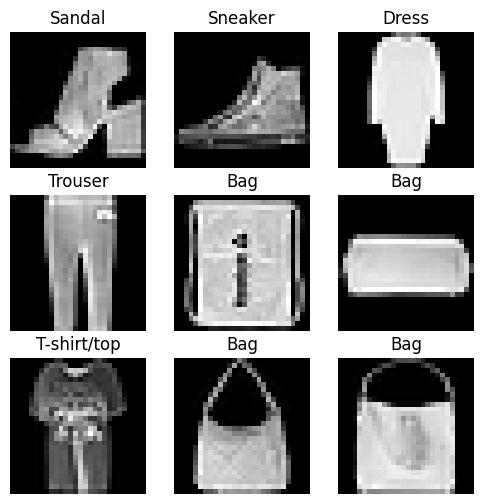

In [9]:
fig = plt.figure(figsize=(6, 6))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

# **4. Wrap Dataset into a DataLoader**

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [11]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# **5. Recreate the CNN TinyVGG Model from [CNN Explainer website](https://poloclub.github.io/cnn-explainer/)**

In [12]:
class FashionMNISTTVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_features: int, hidden_units: int, output_features: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*4*4,
                      out_features=output_features)
        )

    def forward(self, x: torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))

# **6. Build Training Loop**

In [13]:
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        # Send data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_preds = model(X)

        # 2. Calculate the loss and accuracy
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(preds=y_preds.argmax(dim=1), target=y)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate the loss and accuracy per epoch and print out what's happening
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.5f}")

def test_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device: torch.device):
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            # Send data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_preds = model(X)

            # 2. Calculate the loss and accuracy
            loss = loss_fn(test_preds, y)
            test_loss += loss
            test_acc += accuracy_fn(preds=test_preds, target=y)

        # Re-calculate the metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

In [14]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

# **7. Fit the Model**

In [15]:
torch.manual_seed(42)

CNN_model_cpu = FashionMNISTTVGG(1, 10, len(class_names))
CNN_model_cpu

FashionMNISTTVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [16]:
torch.cuda.manual_seed(42)

CNN_model_gpu = FashionMNISTTVGG(1, 10, len(class_names)).to(device)
CNN_model_gpu

FashionMNISTTVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [17]:
# Define loss, optimizer, and accuracy function
from torchmetrics import Accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer_cpu = torch.optim.Adam(params=CNN_model_cpu.parameters(), lr=0.001)
cpu_accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

optimizer_gpu = torch.optim.Adam(params=CNN_model_gpu.parameters(), lr=0.001)
gpu_accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [18]:
# Training on CPU
cpu_start_time = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    # Training
    train_step(model=CNN_model_cpu,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_cpu,
               accuracy_fn=cpu_accuracy_fn,
               device="cpu")

    test_step(model=CNN_model_cpu,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=cpu_accuracy_fn,
              device="cpu")

cpu_end_time = timer()
cpu_total_train_time = print_train_time(start=cpu_start_time,
                                        end=cpu_end_time,
                                        device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.63542 | Train Accuracy: 0.76303
Test Loss: 0.50036 | Test Accuracy: 0.81809
Epoch: 1
--------
Train Loss: 0.43283 | Train Accuracy: 0.84322
Test Loss: 0.41956 | Test Accuracy: 0.85024
Epoch: 2
--------
Train Loss: 0.38892 | Train Accuracy: 0.85997
Test Loss: 0.40976 | Test Accuracy: 0.85333
Epoch: 3
--------
Train Loss: 0.36590 | Train Accuracy: 0.86683
Test Loss: 0.37230 | Test Accuracy: 0.86691
Epoch: 4
--------
Train Loss: 0.34724 | Train Accuracy: 0.87432
Test Loss: 0.36530 | Test Accuracy: 0.86731
Train time on cpu: 287.156 seconds


In [19]:
# Training on GPU
gpu_start_time = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    # Training
    train_step(model=CNN_model_gpu,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_gpu,
               accuracy_fn=gpu_accuracy_fn.to(device),
               device=device)

    test_step(model=CNN_model_gpu,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=gpu_accuracy_fn.to(device),
              device=device)

gpu_end_time = timer()
gpu_total_train_time = print_train_time(start=gpu_start_time,
                                        end=gpu_end_time,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.64839 | Train Accuracy: 0.75780
Test Loss: 0.49273 | Test Accuracy: 0.81919
Epoch: 1
--------
Train Loss: 0.44606 | Train Accuracy: 0.83785
Test Loss: 0.43666 | Test Accuracy: 0.84385
Epoch: 2
--------
Train Loss: 0.39394 | Train Accuracy: 0.85675
Test Loss: 0.38916 | Test Accuracy: 0.85863
Epoch: 3
--------
Train Loss: 0.36042 | Train Accuracy: 0.86980
Test Loss: 0.36195 | Test Accuracy: 0.86981
Epoch: 4
--------
Train Loss: 0.34007 | Train Accuracy: 0.87695
Test Loss: 0.35009 | Test Accuracy: 0.87590
Train time on cpu: 288.227 seconds


# **8. Make Predictions**

In [20]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [21]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 1 (Trouser)


In [22]:
# Make predictions using CNN_model_gpu
pred_probs = make_predictions(model=CNN_model_gpu, data=test_samples)

# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 3, 5, 0, 3, 9, 8, 7, 9])

In [23]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([1, 3, 5, 0, 3, 9, 8, 7, 9], tensor([1, 3, 5, 0, 3, 9, 8, 7, 9]))

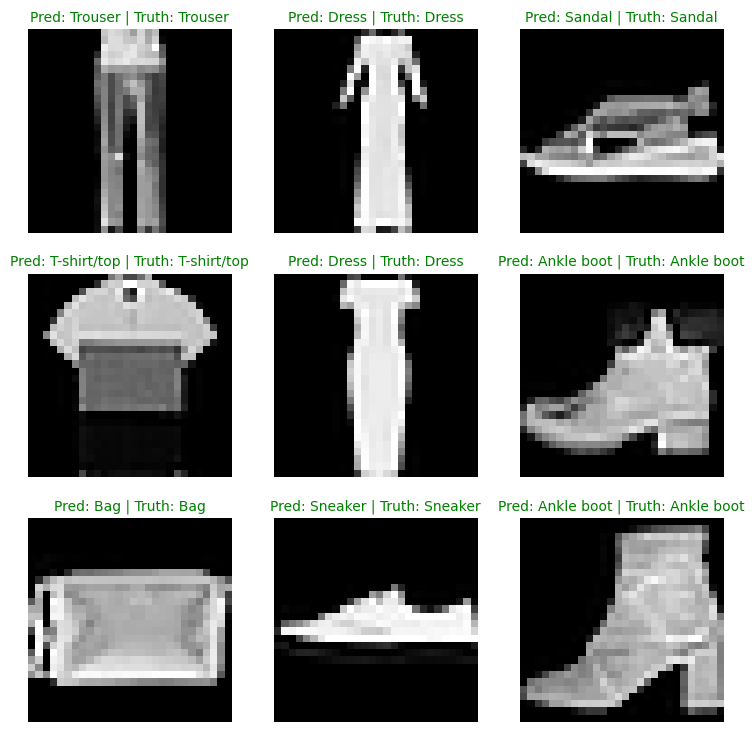

In [24]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

# **9. Evaluate the Model Using Confusion Matrix**

## a. Making predictions on test dataset with our model

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
CNN_model_gpu.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = CNN_model_gpu(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

## b. Making confusion matrix using torchmetrics.ConfusionMatrix, then plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

In [26]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


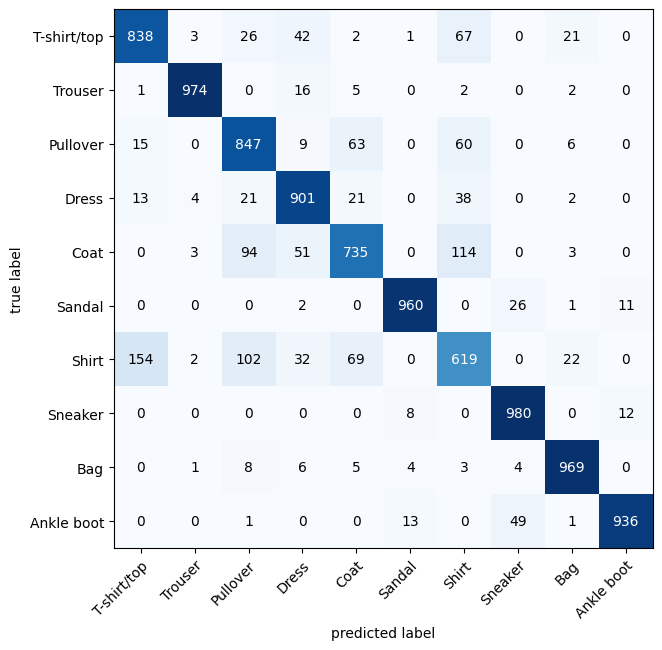

In [27]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_dataset.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
);

# **9. Experiment with the model**

In [28]:
torch.manual_seed(42)

tensor_1 = torch.randint(0, 255, [64, 64]).unsqueeze(dim=0)
tensor_2 = torch.randint(0, 255, [64, 64]).unsqueeze(dim=0)
tensor_3 = torch.randint(0, 255, [64, 64]).unsqueeze(dim=0)

rand_image = torch.concat([tensor_1, tensor_2, tensor_3], dim=0)
rand_image.shape

torch.Size([3, 64, 64])

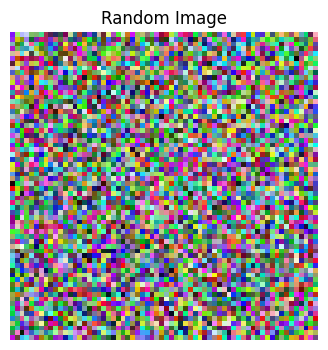

In [29]:
# Plot the rand_image

plt.figure(figsize=(4,4))

plt.imshow(rand_image.permute(1, 2, 0))

plt.title("Random Image")
plt.axis(False);

In [30]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Convert the input tensor to float type
conv_layer(rand_image.float()).shape
# [3, 64, 64] --> [10, 62, 62]
# 10 is the out_channels of conv_layer,
# 64 --> 62 is because the conv_layer doesn't have padding, and using stride=1 with kernel_size=3

# Padding up --> shape larger
# Stride up --> shape smaller
# Kernel size up --> shape smaller

torch.Size([10, 62, 62])

# **10. Conclusion**

There are some data labeling errors on the dataset. For example, I have found out that some "dress" like pictures being labeled as "coat", "shirt" like pictures being labeled as "coat", etc. Also, the labels of the data quite too close to each other, like "Shirt" and "T-shirt/top", "Ankle boot" and "Senaker", "Shirt" and "Coat", etc.

# **Key Lessons:**

---
* **Garbage In, Garbage Out**: No matter how good a model is, its performance won't improve with poor data. This is just like our own learning path: no matter how well we study, if the learning materials are low-quality, our results will be poor. So, choose a right materials and teachers!
---
* The most common mistakes in PyTorch are:
    1. **Shape mismatch**: This often happens when we're working with images (NCHW vs NHWC, squeeze and unsqueeze).
    2. **Datatype mismatch**: This often happens with loss functions or specific operations, requiring you to ensure your tensors are the correct dtype (e.g., torch.float vs torch.Long)
    3. **Device mismatch**: This teaches the habit of being explicit about where your model and your data live.
    
    No matter how skilled we are, we're all human and can make mistakes. The important thing is that it's okay, as long as we learn from them.
---
* PyTorch CV Workflow:
1. **Preparing the dataset**: Set up device-agnostic code (cpu or cuda), load the dataset (typically using torchvision.datasets), and apply any necessary transforms for data augmentation and normalization (like ToTensor()). Finally, wrap the dataset in a DataLoader to create iterable batches for training and testing.
2. **Build the model**: Define a neural network architecture model (a class that inherits from nn.Module), then instantiate this model and send it to the target device. After that, define the loss function (nn.CrossEntropyLoss for multiclass and nn.BCELoss for binary class), optimizer (usually torch.optim.SGD or torch.optim.Adam), and any performance metrics like accuracy.
3. **Build Training loop**:
    - train_step() function: a function that takes a model, a DataLoader, a loss function, and an optimizer. Its job is to perform one epoch of training: it loops over the DataLoader, performs the forward pass, calculates the loss, clear the optimizer (optimizer.zero_grad), does backpropagation (loss.backward()), and updates the weights (optimizer.step()). It should return the average loss and accuracy for the epoch.
    - test_step() function: a function that takes a model, a DataLoader, and a loss function. Its job is to evaluate the model on the test data. It should use torch.inference_mode() to be more efficient and to ensure no gradients are updated. It should return the average test loss and accuracy.
4. **Fit the model and make predictions**: Create the main training loop that iterates for a set number of epochs. In each epoch, call the train_step() and test_step() functions for their respective DataLoaders, printing the results to monitor the model's performance in real-time.
5. **Evaluate the model**: After training is complete, perform a comprehensive evaluation on the test set. Use tools like torchmetrics to calculate quantitative metrics (e.g., accuracy, precision, F1-score) and visualize the results qualitatively with a confusion matrix.
6. **Experiment with the model**: "Hyperparameter Tuning" in Deep Learning, experiment with the hyperparameter of the model, involves adjusting variables like the learning rate, batch size, optimizer type, or model architecture. Use tools like TensorBoard to log and compare the results of these experiments.
7. **Save the model**: Save the best model's learned parameters for future use. The best practice is to save the model's state_dict, as it is the most flexible and reliable method for inference and deployment.